In [ ]:
# Ch Mubashir Lab Task
#Implementation of 5 Algorithms(ANN,CNN,GMM,MCI,MCL)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    silhouette_score
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns


ANN Accuracy: 0.9356


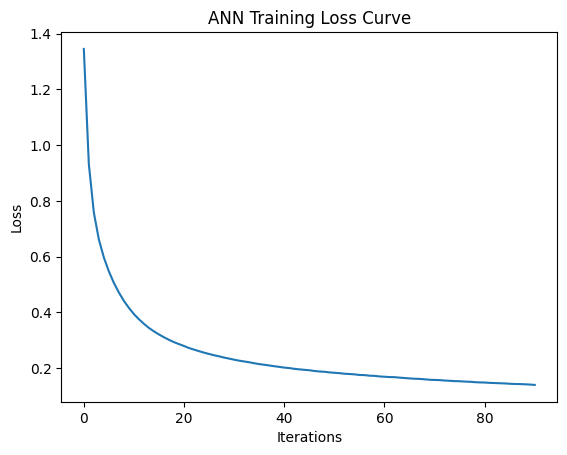

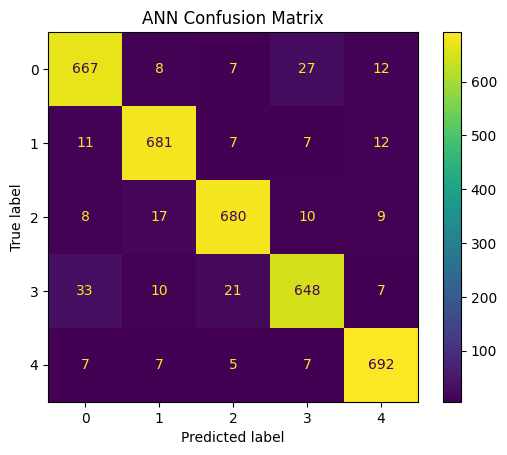


Classification Report for ANN:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       721
           1       0.94      0.95      0.95       718
           2       0.94      0.94      0.94       724
           3       0.93      0.90      0.91       719
           4       0.95      0.96      0.95       718

    accuracy                           0.94      3600
   macro avg       0.94      0.94      0.94      3600
weighted avg       0.94      0.94      0.94      3600



In [ ]:
#Artificial Neural Network (ANN)
# 1. Load Dataset

df = pd.read_csv("dataset_classification.csv")

# Features and target
X = df.drop('label', axis=1)
y = df['label']

# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 3. Feature Scaling
scaler_ann = StandardScaler()
X_train_scaled = scaler_ann.fit_transform(X_train)
X_test_scaled  = scaler_ann.transform(X_test)

# 4. ANN Model (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    max_iter=300,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train_scaled, y_train)

# 5. Evaluation
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nANN Accuracy: {accuracy:.4f}")

# Loss Curve Plot
plt.plot(mlp.loss_curve_)
plt.title("ANN Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("ANN Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report for ANN:")
print(classification_report(y_test, y_pred))


Cluster → Most Frequent Label Mapping:
Cluster
0    4
1    3
2    1
3    2
4    1
Name: True_Label, dtype: int64

GMM Purity: 0.6358
Silhouette Score: 0.0509


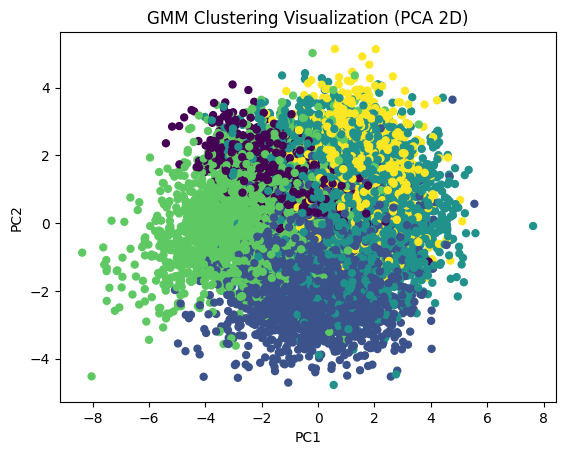

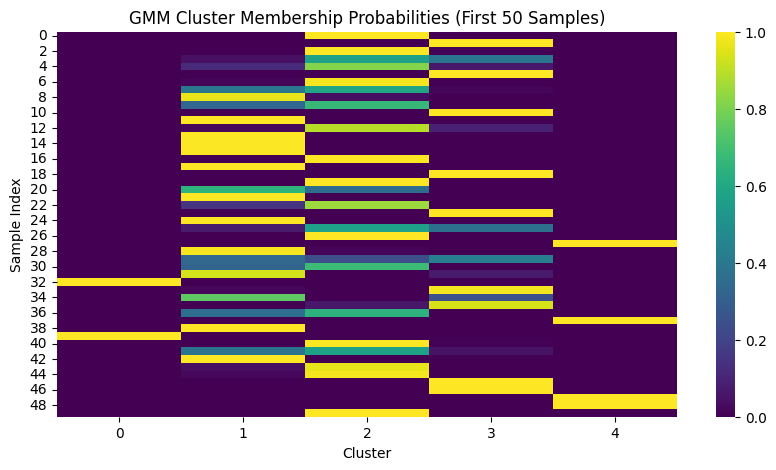

In [ ]:
#Gaussian Mixture Model (GMM):
# 1. Load Dataset
df = pd.read_csv("dataset_classification.csv")

# Features and target
X = df.drop('label', axis=1)
y = df['label']

# 2. Feature Scaling
scaler_gmm = StandardScaler()
X_scaled = scaler_gmm.fit_transform(X)

# 3. GMM Model
gmm = GaussianMixture(
    n_components=5,   # Number of clusters = number of classes
    covariance_type='full',
    random_state=42
)

gmm.fit(X_scaled)

# 4. Predict Clusters
clusters = gmm.predict(X_scaled)

# 5. Purity Calculation
results = pd.DataFrame({
    'True_Label': y,
    'Cluster': clusters
})

# Map each cluster → most frequent true label
cluster_map = results.groupby('Cluster')['True_Label'].apply(lambda x: x.value_counts().idxmax())

print("\nCluster → Most Frequent Label Mapping:")
print(cluster_map)

# Purity Score
correct = results.apply(
    lambda row: 1 if row['True_Label'] == cluster_map[row['Cluster']] else 0,
    axis=1
).sum()

purity = correct / len(results)
print(f"\nGMM Purity: {purity:.4f}")

# 6. Silhouette Score
sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.4f}")

# 7. PCA Visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, s=25, cmap='viridis')
plt.title("GMM Clustering Visualization (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 8. Probability Heatmap (First 50 Samples)
probs = gmm.predict_proba(X_scaled)

plt.figure(figsize=(10, 5))
sns.heatmap(probs[:50], cmap="viridis")
plt.title("GMM Cluster Membership Probabilities (First 50 Samples)")
plt.xlabel("Cluster")
plt.ylabel("Sample Index")
plt.show()

In [ ]:
#CNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# TensorFlow is required for CNNs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# --- 1. Load Dataset (MNIST) ---
# MNIST is 70,000 images of handwritten digits (0-9)
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int')

# --- 2. Data Preprocessing ---
# a. Normalization: Scale pixel values from 0-255 to 0-1
X = X / 255.0

# b. Reshape: Convert the flattened 784 features into 28x28x1 image format
# CNN expects shape: (samples, height, width, channels)
X = X.reshape(-1, 28, 28, 1)

# c. Categorical Encoding: Convert integer labels to one-hot encoding
num_classes = 10
y = to_categorical(y, num_classes=num_classes)

# d. Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# --- 3. CNN Model (Sequential) ---
model = Sequential([
    # Convolutional Layer 1: Learn 32 features/filters
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Pooling Layer 1: Downsample by 2x2
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2: Learn 64 features/filters
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # Pooling Layer 2: Downsample by 2x2
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the 3D feature maps to 1D feature vectors
    Flatten(),

    # Dense Layer
    Dense(128, activation='relu'),

    # Output Layer: 10 classes (0-9) with softmax for probability distribution
    Dense(num_classes, activation='softmax')
])

# --- 4. Compile and Train Model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', # Used for multi-class classification
    metrics=['accuracy']
)

# Using a small subset (5000 samples) and limited epochs (5) for a quick demonstration
X_train_subset = X_train[:5000]
y_train_subset = y_train[:5000]

history = model.fit(
    X_train_subset, y_train_subset,
    epochs=5,
    batch_size=32,
    verbose=0,
    validation_split=0.1
)

# --- 5. Evaluation ---
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nCNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")

# Plotting Loss and Accuracy History
# (Code to generate cnn_training_performance.png)

# Print the model summary
print("\nCNN Model Summary:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



CNN Test Loss: 0.1321
CNN Test Accuracy: 0.9631

CNN Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

[MCI] Silhouette Score: 0.5836
[MCI] V-Measure Score: 1.0000


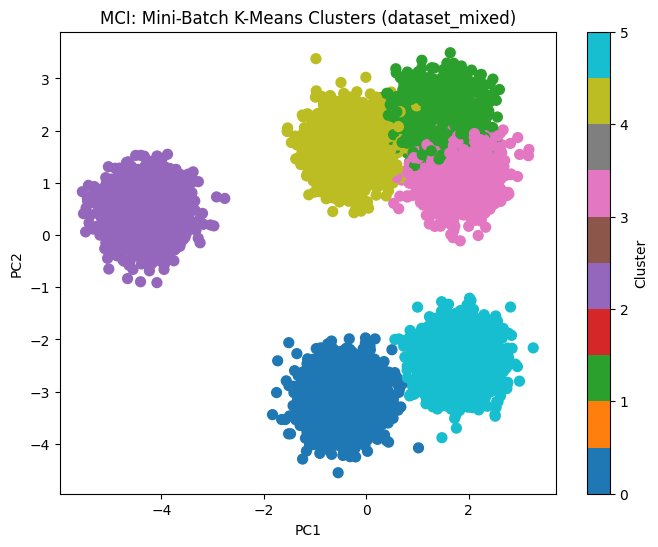

In [ ]:
# MCI
from sklearn.cluster import MiniBatchKMeans, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, v_measure_score

# 1. MCI: Mini-Batch K-Means Clustering on Numeric Data

df_mixed = pd.read_csv("dataset_mixed.csv")
X_mixed = df_mixed.drop('label', axis=1)
y_mixed = df_mixed['label']

# Scale numeric features
scaler_mixed = StandardScaler()
X_mixed_scaled = scaler_mixed.fit_transform(X_mixed)

# Determine number of clusters from labels
k_mixed = y_mixed.nunique()

# MCI: Mini-Batch K-Means
mci_model = MiniBatchKMeans(n_clusters=k_mixed, random_state=42, batch_size=256, n_init='auto')
mci_model.fit(X_mixed_scaled)
clusters_mci = mci_model.predict(X_mixed_scaled)

# Evaluation
sil_mci = silhouette_score(X_mixed_scaled, clusters_mci)
v_measure_mci = v_measure_score(y_mixed, clusters_mci)
print(f"[MCI] Silhouette Score: {sil_mci:.4f}")
print(f"[MCI] V-Measure Score: {v_measure_mci:.4f}")

# PCA Visualization
pca_mci = PCA(n_components=2)
X_mci_pca = pca_mci.fit_transform(X_mixed_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_mci_pca[:,0], X_mci_pca[:,1], c=clusters_mci, cmap='tab10', s=50)
plt.title("MCI: Mini-Batch K-Means Clusters (dataset_mixed)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.savefig("MCI_clusters.png")
plt.show()

[MCL] Number of Clusters: 2
[MCL] Silhouette Score: 0.5422


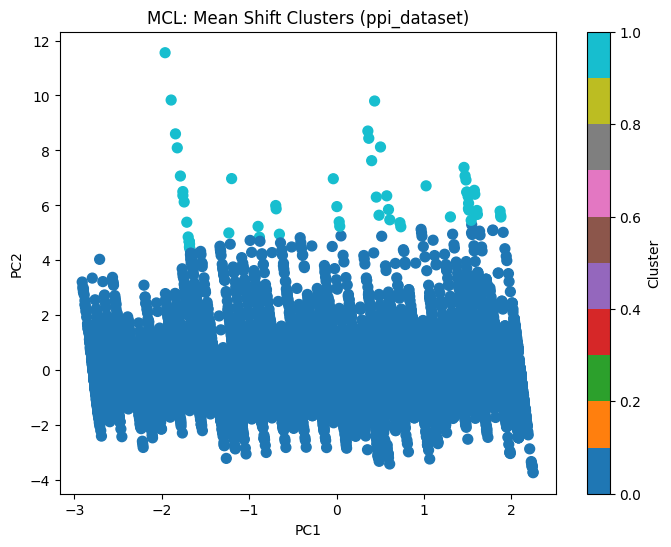

In [ ]:

#  MCL: Mean Shift Clustering on Mixed Data

df_ppi = pd.read_csv("ppi_dataset.csv")

categorical_features = ['producer_price_index_item', 'month_of_forecast', 'attribute']
numerical_features = ['year_of_forecast', 'year_being_forecast', 'forecast_percent_change']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)
X_ppi_processed = preprocessor.fit_transform(df_ppi[categorical_features + numerical_features])

# MCL: Mean Shift
bandwidth = estimate_bandwidth(X_ppi_processed.toarray(), quantile=0.2, n_samples=500)
mcl_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mcl_model.fit(X_ppi_processed.toarray())
clusters_mcl = mcl_model.labels_

# Evaluation
n_clusters_mcl = len(np.unique(clusters_mcl))
sil_mcl = silhouette_score(X_ppi_processed.toarray(), clusters_mcl) if n_clusters_mcl > 1 else np.nan
print(f"[MCL] Number of Clusters: {n_clusters_mcl}")
print(f"[MCL] Silhouette Score: {sil_mcl:.4f}")

# PCA Visualization
pca_mcl = PCA(n_components=2)
X_mcl_pca = pca_mcl.fit_transform(X_ppi_processed.toarray())
plt.figure(figsize=(8,6))
plt.scatter(X_mcl_pca[:,0], X_mcl_pca[:,1], c=clusters_mcl, cmap='tab10', s=50)
plt.title("MCL: Mean Shift Clusters (ppi_dataset)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.savefig("MCL_clusters.png")
plt.show()
